## Load Datasets

In [61]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

import numpy as np
import pandas as pd

# Load the training data
train_data = pd.read_csv('yelp242a_train.csv')
# Load the Testing data
test_data = pd.read_csv('yelp242a_test.csv')

# Replace '(Missing)' with a new category 'Missing' for each attribute
train_data.fillna('Missing', inplace=True)
test_data.fillna('Missing', inplace=True)

# Separate features and target variable
y_train = train_data['stars']
y_test = test_data['stars']

# Extract the independent variables (features) from the train DataFrame
X_train = pd.get_dummies(train_data.drop(columns=['stars'], axis = 1))
X_test = pd.get_dummies(test_data.drop(columns=['stars'], axis = 1))

# print(train_data.shape)
# print(test_data.shape)
# train_data.info()
# train_data.head(20)

## Linear Regression Model

In [62]:
import statsmodels.api as sm

# Define the formula for linear regression
formula = "stars ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + \
           C(Alcohol, Treatment(reference='(Missing)')) + \
           C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) + \
           C(WiFi, Treatment(reference='(Missing)')) + \
           C(BikeParking, Treatment(reference='(Missing)')) + \
           C(ByAppointmentOnly, Treatment(reference='(Missing)')) + \
           C(WheelechairAccessible, Treatment(reference='(Missing)')) + \
           C(OutdoorSeating, Treatment(reference='(Missing)')) + \
           C(RestaurantsReservations, Treatment(reference='(Missing)')) + \
           C(DogsAllowed, Treatment(reference='(Missing)')) + \
           C(Caters, Treatment(reference='(Missing)'))"

# Fit the linear regression model
lr = sm.OLS.from_formula(formula, data=train_data)
lr_results = lr.fit()

# # Print the summary of the model
print(lr_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     48.56
Date:                Sat, 09 Mar 2024   Prob (F-statistic):          1.30e-218
Time:                        12:36:11   Log-Likelihood:                -7295.9
No. Observations:                6272   AIC:                         1.464e+04
Df Residuals:                    6246   BIC:                         1.482e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

## Decision Tree Regression Model

Node count = 9


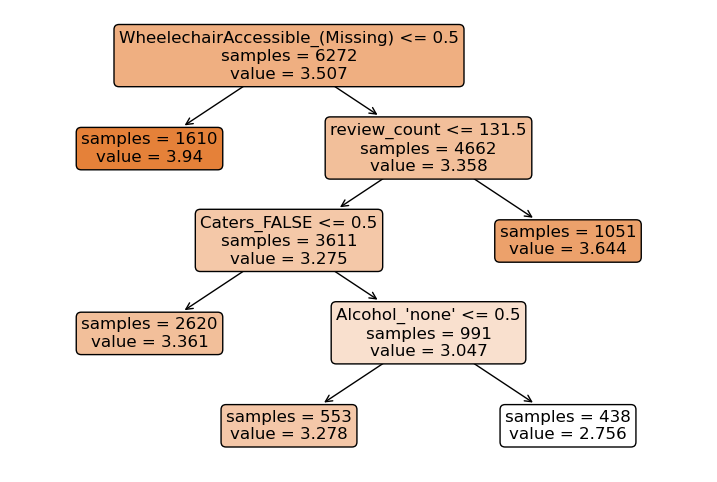

In [63]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dtr = DecisionTreeRegressor(min_samples_leaf=5, 
                            ccp_alpha=0.01,
                            random_state=88)
dtr = dtr.fit(X_train, y_train)

print('Node count =', dtr.tree_.node_count)

plt.figure(figsize=(9, 6))
plot_tree(dtr, 
          feature_names=X_train.columns.tolist(),
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

## Regression Tree Model with Cross-Validation

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'ccp_alpha': np.linspace(0, 0.1, 201)}

# Create the GridSearchCV object
dtr_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(min_samples_leaf=5, random_state=88),
                           param_grid=param_grid,
                           verbose=1,
                           cv=5)  # 5-fold cross-validation

# Fit the GridSearchCV object to the data
dtr_grid_search.fit(X_train, y_train)

# Get the best ccp_alpha value and the corresponding mean cross-validated score
dtr_best_ccp_alpha = dtr_grid_search.best_params_['ccp_alpha']
dtr_best_score = dtr_grid_search.best_score_

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


In [99]:
# Producing accuracy and cpp values results from Decission Regression Tree CV
acc = dtr_grid_search.cv_results_['mean_test_score']
ccp = dtr_grid_search.cv_results_['param_ccp_alpha'].data
pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(5)

,ccp alpha,Validation Accuracy
0,0.0,-0.013569
1,0.0005,0.132452
2,0.001,0.169456
3,0.0015,0.169151
4,0.002,0.156727


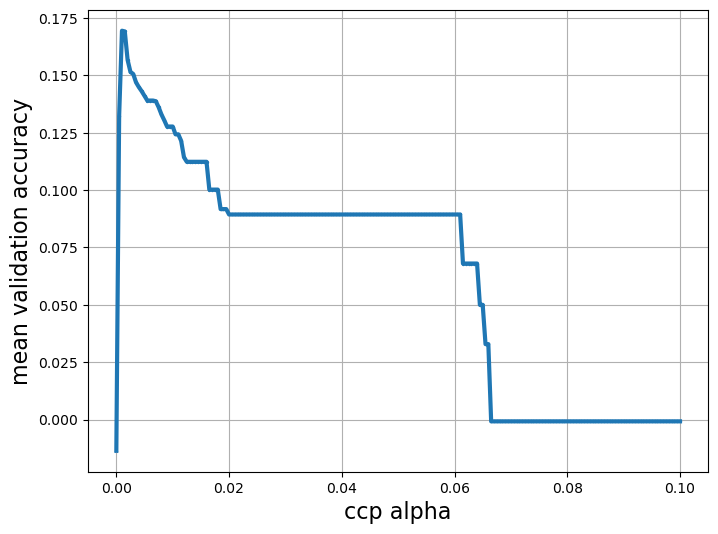

In [66]:
# Plot to vizualize the Decission Regression Tree with CV results
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

Node count = 59


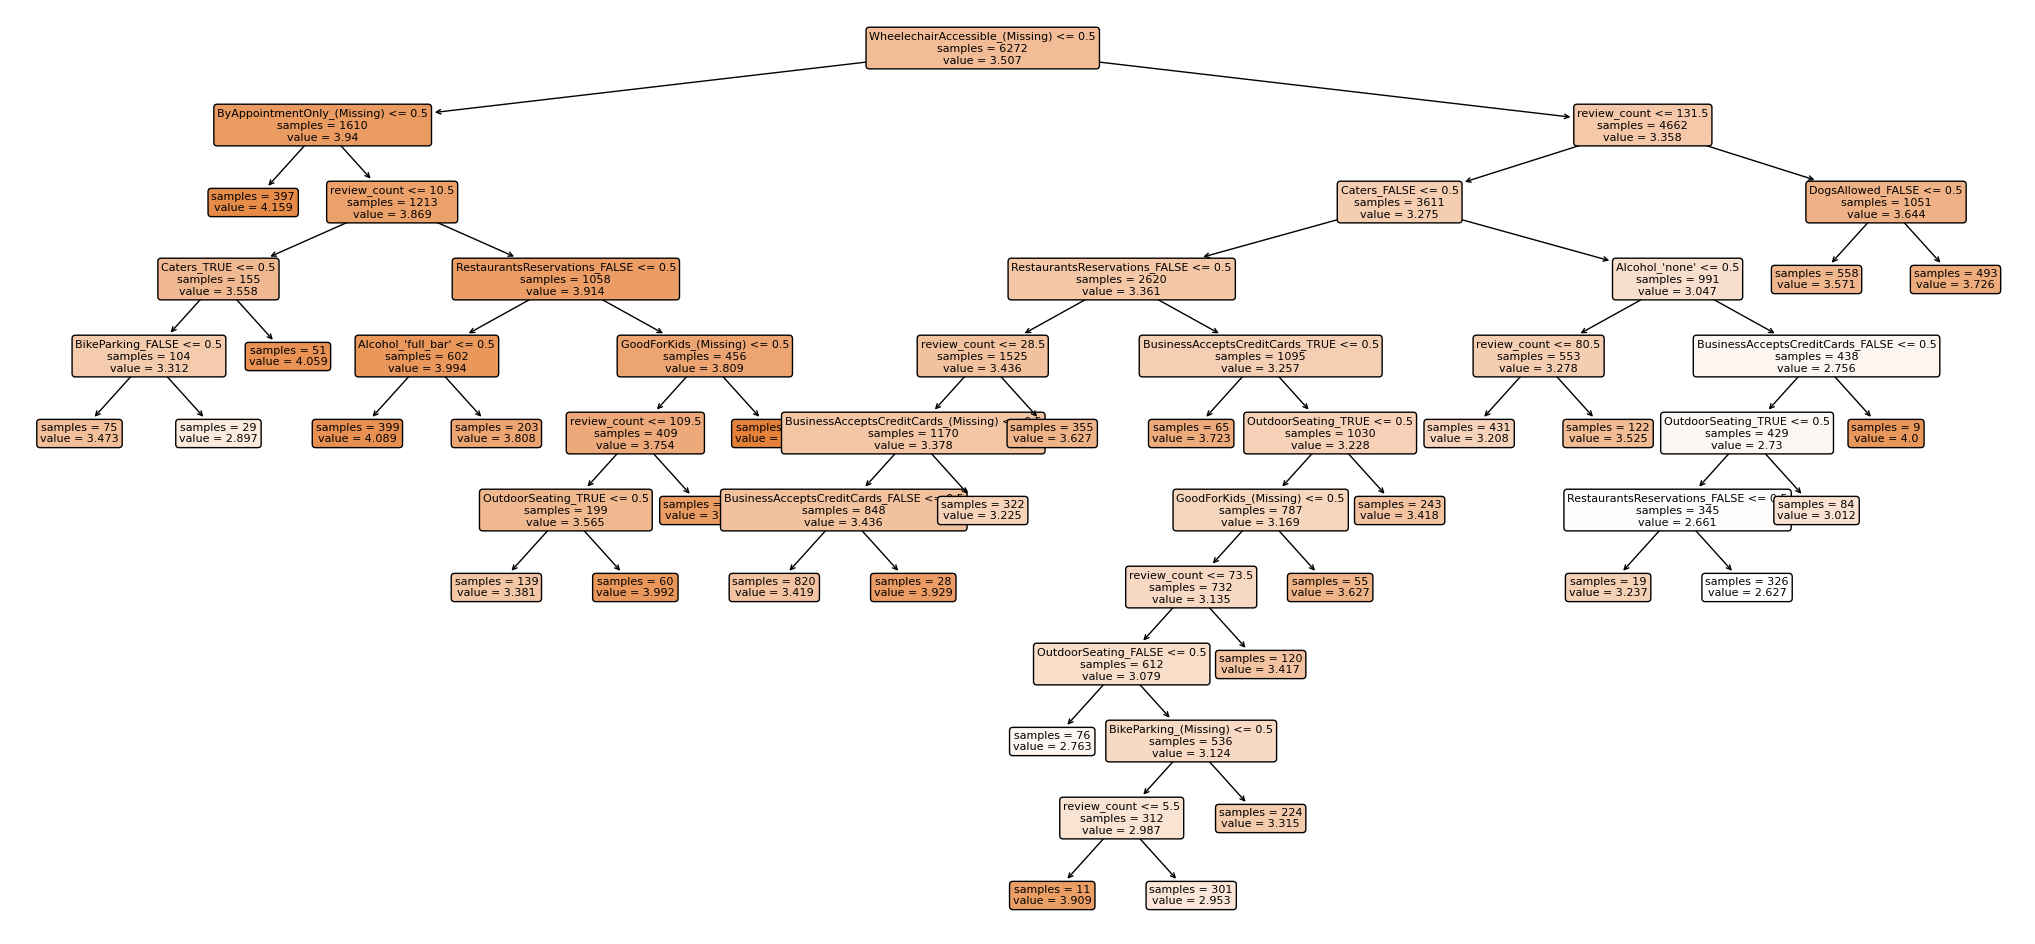

Best ccp_alpha: 0.001
Best cross-validated score: 0.1694564461881206


In [67]:
print('Node count =', dtr_grid_search.best_estimator_.tree_.node_count)

plt.figure(figsize=(26, 12))
plot_tree(dtr_grid_search.best_estimator_, 
          feature_names=X_train.columns.tolist(),
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=8)
plt.show()

print("Best ccp_alpha:", dtr_best_ccp_alpha)
print("Best cross-validated score:", dtr_best_score)

## R-square values & MAE from the training data results for the models:

    - Linear Regression Model
    - Decision Tree Regression Model
    - Decision Tree Regression Model w/CV

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error

# ------------------------
# Linear Regression Model:
# ------------------------
# Predict the target variable on the training data
y_train_pred_lr = lr_results.predict(train_data)
# Calculate R-squared value
r2_value = lr_results.rsquared
# Print the R-squared value
print("Linear Regression Model -----------------> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(y_train, y_train_pred_lr)
# Print the mean absolute error
print("Linear Regression Model -------------> Mean Absolute Error:", mae_value)

# -------------------------------
# Decision Tree Regression Model:
# -------------------------------
# Predict the target variable on the training data
y_train_pred_dtr = dtr.predict(X_train)
# Calculate R-squared value
r2_value = r2_score(y_train, y_train_pred_dtr)
# Print the R-squared value
print("Decision Tree Regression Model ----------> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(y_train, y_train_pred_dtr)
# Print the mean absolute error
print("Decision Tree Regression Model ------> Mean Absolute Error:", mae_value)

# ---------------------------------------
# Decision Tree Regression Model with CV:
# ---------------------------------------
# Predict the target variable on the training data
y_train_pred_dtr_grid = dtr_grid_search.best_estimator_.predict(X_train)
# Calculate R-squared value
r2_value = r2_score(y_train, y_train_pred_dtr_grid)
# Print the R-squared value
print("Decision Tree Regression Model w/CV -----> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(y_train, y_train_pred_dtr_grid)
# Print the mean absolute error
print("Decision Tree Regression Model w/CV -> Mean Absolute Error:", mae_value)

Linear Regression Model -----------------> R-squared value: 0.16272858449701189
Linear Regression Model -------------> Mean Absolute Error: 0.6197609124801725
Decision Tree Regression Model ----------> R-squared value: 0.14561740572456883
Decision Tree Regression Model ------> Mean Absolute Error: 0.6232751904494186
Decision Tree Regression Model w/CV -----> R-squared value: 0.21498766721846085
Decision Tree Regression Model w/CV -> Mean Absolute Error: 0.5941550289925366


## Out-of-Sample R-square values & MAE for the models:

    - Linear Regression Model
    - Decision Tree Regression Model
    - Decision Tree Regression Model w/CV

In [101]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate metrics for Linear Regression Model
y_test_pred_lr = lr_results.predict(test_data)
lr_r2_value = r2_score(y_test, y_test_pred_lr)
lr_mae_value = mean_absolute_error(y_test, y_test_pred_lr)

# Calculate metrics for Decision Tree Regression Model
y_test_pred_dtr = dtr.predict(X_test)
dtr_r2_value = r2_score(y_test, y_test_pred_dtr)
dtr_mae_value = mean_absolute_error(y_test, y_test_pred_dtr)

# Calculate metrics for Decision Tree Regression Model with CV
y_test_pred_dtr_grid = dtr_grid_search.best_estimator_.predict(X_test)
dtr_grid_r2_value = r2_score(y_test, y_test_pred_dtr_grid)
dtr_grid_mae_value = mean_absolute_error(y_test, y_test_pred_dtr_grid)

# Create a pandas DataFrame to represent the metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Decision Tree with CV'],
    'R-squared': [lr_r2_value, dtr_r2_value, dtr_grid_r2_value],
    'Mean Absolute Error': [lr_mae_value, dtr_mae_value, dtr_grid_mae_value]
})

print(metrics_df)

                   Model  R-squared  Mean Absolute Error
0      Linear Regression   0.175930             0.620526
1          Decision Tree   0.141167             0.633965
2  Decision Tree with CV   0.183991             0.614534


In [102]:
from sklearn.metrics import r2_score, mean_absolute_error

# ------------------------
# Linear Regression Model:
# ------------------------
# Predict the target variable on the training data
y_test_pred_lr = lr_results.predict(test_data)
# Calculate R-squared value
r2_value = r2_score(y_test, y_test_pred_lr)
# Print the R-squared value
print("Linear Regression Model -----------------> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(y_test, y_test_pred_lr)
# Print the mean absolute error
print("Linear Regression Model -------------> Mean Absolute Error:", mae_value)

# -------------------------------
# Decision Tree Regression Model:
# -------------------------------
# Predict the target variable on the training data
y_test_pred_dtr = dtr.predict(X_test)
# Calculate R-squared value
r2_value = r2_score(y_test, y_test_pred_dtr)
# Print the R-squared value
print("Decision Tree Regression Model ----------> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(y_test, y_test_pred_dtr)
# Print the mean absolute error
print("Decision Tree Regression Model ------> Mean Absolute Error:", mae_value)

# ---------------------------------------
# Decision Tree Regression Model with CV:
# ---------------------------------------
# Predict the target variable on the training data
y_test_pred_dtr_grid = dtr_grid_search.best_estimator_.predict(X_test)
# Calculate R-squared value
r2_value = r2_score(y_test, y_test_pred_dtr_grid)
# Print the R-squared value
print("Decision Tree Regression Model w/CV -----> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(y_test, y_test_pred_dtr_grid)
# Print the mean absolute error
print("Decision Tree Regression Model w/CV -> Mean Absolute Error:", mae_value)

Linear Regression Model -----------------> R-squared value: 0.1759300869088657
Linear Regression Model -------------> Mean Absolute Error: 0.6205260664008891
Decision Tree Regression Model ----------> R-squared value: 0.14116706240063115
Decision Tree Regression Model ------> Mean Absolute Error: 0.6339650035095369
Decision Tree Regression Model w/CV -----> R-squared value: 0.1839908905631561
Decision Tree Regression Model w/CV -> Mean Absolute Error: 0.6145337140988565


## Constructing new variable on training and test datasets called 'fourOrAbove'. 

This variable should be equal to 1 if stars is greater than or equal to 4 and equal to 0 otherwise.

In [98]:
# For training data
train_data['fourOrAbove'] = (train_data['stars'] >= 4).astype(int)
# For test data
test_data['fourOrAbove'] = (test_data['stars'] >= 4).astype(int)

# Check the first few rows to verify the new variable
print(train_data[['stars', 'fourOrAbove']].head())
print(test_data[['stars', 'fourOrAbove']].head())

   stars  fourOrAbove
0    4.0            1
1    3.5            0
2    3.0            0
3    4.0            1
4    3.0            0
   stars  fourOrAbove
0    2.5            0
1    4.0            1
2    4.0            1
3    2.5            0
4    3.5            0


## Generating Predictions by thresholding the model predictions

In [103]:
# Linear Regression Model
y_pred_lr_binary = (y_test_pred_lr >= 4).astype(int)
# Decision Tree Regression Model
y_pred_dtr_binary = (y_test_pred_dtr >= 4).astype(int)
# Decision Tree Regression Model with CV
y_pred_dtr_grid_binary = (y_test_pred_dtr_grid >= 4).astype(int)

import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate metrics for Linear Regression Model
lr_r2_value = r2_score(test_data['fourOrAbove'], y_pred_lr_binary)
lr_mae_value = mean_absolute_error(test_data['fourOrAbove'], y_pred_lr_binary)

# Calculate metrics for Decision Tree Regression Model
dtr_r2_value = r2_score(test_data['fourOrAbove'], y_pred_dtr_binary)
dtr_mae_value = mean_absolute_error(test_data['fourOrAbove'], y_pred_dtr_binary)

# Calculate metrics for Decision Tree Regression Model with CV
dtr_grid_r2_value = r2_score(test_data['fourOrAbove'], y_pred_dtr_grid_binary)
dtr_grid_mae_value = mean_absolute_error(test_data['fourOrAbove'], y_pred_dtr_grid_binary)

# Create a pandas DataFrame to represent the metrics
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Decision Tree with CV'],
    'R-squared value': [lr_r2_value, dtr_r2_value, dtr_grid_r2_value],
    'Mean Absolute Error': [lr_mae_value, dtr_mae_value, dtr_grid_mae_value]
})

print(results_df)


                   Model  R-squared value  Mean Absolute Error
0      Linear Regression        -0.485354             0.365327
1          Decision Tree        -0.774257             0.436384
2  Decision Tree with CV        -0.429389             0.351562


In [ ]:


# ------------------------
# Linear Regression Model:
# ------------------------
# Calculate R-squared value
r2_value = r2_score(test_data['fourOrAbove'], y_pred_lr_binary)
# Print the R-squared value
print("Linear Regression Model -----------------> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(test_data['fourOrAbove'], y_pred_lr_binary)
# Print the mean absolute error
print("Linear Regression Model -------------> Mean Absolute Error:", mae_value)

# -------------------------------
# Decision Tree Regression Model:
# -------------------------------
# Calculate R-squared value
r2_value = r2_score(test_data['fourOrAbove'], y_pred_dtr_binary)
# Print the R-squared value
print("Decision Tree Regression Model ----------> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(test_data['fourOrAbove'], y_pred_dtr_binary)
# Print the mean absolute error
print("Decision Tree Regression Model ------> Mean Absolute Error:", mae_value)

# ---------------------------------------
# Decision Tree Regression Model with CV:
# ---------------------------------------
# Calculate R-squared value
r2_value = r2_score(test_data['fourOrAbove'], y_pred_dtr_grid_binary)
# Print the R-squared value
print("Decision Tree Regression Model w/CV -----> R-squared value:", r2_value)
# Calculate mean absolute error
mae_value = mean_absolute_error(test_data['fourOrAbove'], y_pred_dtr_grid_binary)
# Print the mean absolute error
print("Decision Tree Regression Model w/CV -> Mean Absolute Error:", mae_value)

## Calculating Accuracy, TPR, and FPR for:

    - Baseline
    - Linear Regression Model
    - Decision Tree Regression Model
    - Decision Tree Regression Model w/CV

In [72]:
from sklearn.metrics import confusion_matrix

# Function to calculate TPR and FPR
def calculate_tpr_fpr(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

# Baseline model (always predicting majority class)
baseline_pred = np.zeros_like(test_data['fourOrAbove'])  # Predicting all as negative (0)
baseline_conf_matrix = confusion_matrix(test_data['fourOrAbove'], baseline_pred)
baseline_accuracy = np.sum(np.diag(baseline_conf_matrix)) / np.sum(baseline_conf_matrix)
baseline_tpr, baseline_fpr = calculate_tpr_fpr(baseline_conf_matrix)

print("Baseline Model:")
print("Confusion Matrix:")
print(baseline_conf_matrix)
print("Accuracy:", baseline_accuracy)
print("TPR (True Positive Rate):", baseline_tpr)
print("FPR (False Positive Rate):", baseline_fpr)
print()

# Linear Regression Model
lr_conf_matrix = confusion_matrix(test_data['fourOrAbove'], y_pred_lr_binary)
lr_accuracy = np.sum(np.diag(lr_conf_matrix)) / np.sum(lr_conf_matrix)
lr_tpr, lr_fpr = calculate_tpr_fpr(lr_conf_matrix)

print("Linear Regression Model:")
print("Confusion Matrix:")
print(lr_conf_matrix)
print("Accuracy:", lr_accuracy)
print("TPR (True Positive Rate):", lr_tpr)
print("FPR (False Positive Rate):", lr_fpr)
print()

# Decision Tree Regression Model
dtr_conf_matrix = confusion_matrix(test_data['fourOrAbove'], y_pred_dtr_binary)
dtr_accuracy = np.sum(np.diag(dtr_conf_matrix)) / np.sum(dtr_conf_matrix)
dtr_tpr, dtr_fpr = calculate_tpr_fpr(dtr_conf_matrix)

print("Decision Tree Regression Model:")
print("Confusion Matrix:")
print(dtr_conf_matrix)
print("Accuracy:", dtr_accuracy)
print("TPR (True Positive Rate):", dtr_tpr)
print("FPR (False Positive Rate):", dtr_fpr)
print()

# Decision Tree Regression Model with CV
dtr_grid_conf_matrix = confusion_matrix(test_data['fourOrAbove'], y_pred_dtr_grid_binary)
dtr_grid_accuracy = np.sum(np.diag(dtr_grid_conf_matrix)) / np.sum(dtr_grid_conf_matrix)
dtr_grid_tpr, dtr_grid_fpr = calculate_tpr_fpr(dtr_grid_conf_matrix)

print("Decision Tree Regression Model with CV:")
print("Confusion Matrix:")
print(dtr_grid_conf_matrix)
print("Accuracy:", dtr_grid_accuracy)
print("TPR (True Positive Rate):", dtr_grid_tpr)
print("FPR (False Positive Rate):", dtr_grid_fpr)


Baseline Model:
Confusion Matrix:
[[1515    0]
 [1173    0]]
Accuracy: 0.5636160714285714
TPR (True Positive Rate): 0.0
FPR (False Positive Rate): 0.0

Linear Regression Model:
Confusion Matrix:
[[1457   58]
 [ 924  249]]
Accuracy: 0.6346726190476191
TPR (True Positive Rate): 0.21227621483375958
FPR (False Positive Rate): 0.03828382838283828

Decision Tree Regression Model:
Confusion Matrix:
[[1515    0]
 [1173    0]]
Accuracy: 0.5636160714285714
TPR (True Positive Rate): 0.0
FPR (False Positive Rate): 0.0

Decision Tree Regression Model with CV:
Confusion Matrix:
[[1439   76]
 [ 869  304]]
Accuracy: 0.6484375
TPR (True Positive Rate): 0.2591645353793691
FPR (False Positive Rate): 0.050165016501650166


## Logistic Regression Model

In [73]:
import statsmodels.formula.api as smf

# Define the formula for logistic regression
formula_logistic = "fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference='(Missing)')) + \
           C(Alcohol, Treatment(reference='(Missing)')) + \
           C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) + \
           C(WiFi, Treatment(reference='(Missing)')) + \
           C(BikeParking, Treatment(reference='(Missing)')) + \
           C(ByAppointmentOnly, Treatment(reference='(Missing)')) + \
           C(WheelechairAccessible, Treatment(reference='(Missing)')) + \
           C(OutdoorSeating, Treatment(reference='(Missing)')) + \
           C(RestaurantsReservations, Treatment(reference='(Missing)')) + \
           C(DogsAllowed, Treatment(reference='(Missing)')) + \
           C(Caters, Treatment(reference='(Missing)'))"

# Fit the logistic regression model
logistic_model = smf.logit(formula=formula_logistic, data=train_data).fit()

# Print the summary of the model
print(logistic_model.summary())

# Make predictions on the train data
y_pred_logistic_train = logistic_model.predict(train_data)
y_pred_logistic_binary_train = (y_pred_logistic_train >= 0.5).astype(int)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(test_data)
y_pred_logistic_binary = (y_pred_logistic >= 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.612512
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.1081
Time:                        12:36:24   Log-Likelihood:                -3841.7
converged:                       True   LL-Null:                       -4307.1
Covariance Type:            nonrobust   LLR p-value:                2.537e-180
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------

In [74]:
# Logistic Regression Model
logic_conf_matrix = confusion_matrix(train_data['fourOrAbove'], y_pred_logistic_binary_train)
logic_accuracy = np.sum(np.diag(logic_conf_matrix)) / np.sum(logic_conf_matrix)
logic_tpr, logic_fpr = calculate_tpr_fpr(logic_conf_matrix)

print("Logistic Regression Model (Training set):")
print("Confusion Matrix:")
print(logic_conf_matrix)
print("Accuracy:", logic_accuracy)
print("TPR (True Positive Rate):", logic_tpr)
print("FPR (False Positive Rate):", logic_fpr)
print()

logic_conf_matrix = confusion_matrix(test_data['fourOrAbove'], y_pred_logistic_binary)
logic_accuracy = np.sum(np.diag(logic_conf_matrix)) / np.sum(logic_conf_matrix)
logic_tpr, logic_fpr = calculate_tpr_fpr(logic_conf_matrix)

print("Logistic Regression Model (Test set):")
print("Confusion Matrix:")
print(logic_conf_matrix)
print("Accuracy:", logic_accuracy)
print("TPR (True Positive Rate):", logic_tpr)
print("FPR (False Positive Rate):", logic_fpr)
print()

Logistic Regression Model (Training set):
Confusion Matrix:
[[2843  648]
 [1430 1351]]
Accuracy: 0.6686862244897959
TPR (True Positive Rate): 0.48579647608773824
FPR (False Positive Rate): 0.18562016614150673

Logistic Regression Model (Test set):
Confusion Matrix:
[[1254  261]
 [ 601  572]]
Accuracy: 0.6793154761904762
TPR (True Positive Rate): 0.4876385336743393
FPR (False Positive Rate): 0.17227722772277226



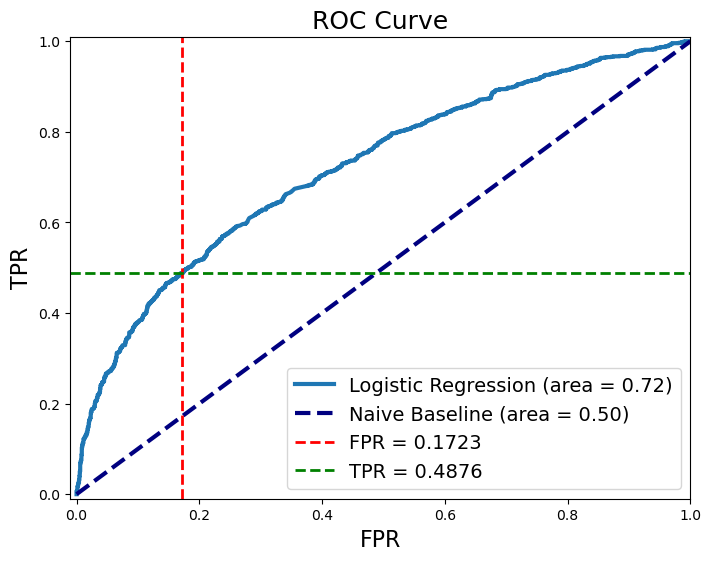

In [111]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(test_data['fourOrAbove'], y_pred_logistic)
roc_auc = auc(fpr, tpr)

# Find the index where FPR is closest to 0.5
idx = (np.abs(fpr - 0.5)).argmin()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.axvline(x=0.17227722772277226, color='red', linestyle='--', lw=2, label='FPR = 0.1723')
plt.axhline(y=0.4876385336743393, color='green', linestyle='--', lw=2, label='TPR = 0.4876')
plt.legend(loc='lower right', fontsize=14)
plt.show()

## Classification Tree Model

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree Classifier model
clf = DecisionTreeClassifier(min_samples_leaf=5, ccp_alpha=0.01, random_state=88)

# Fit the model on the training data
clf.fit(X_train, train_data['fourOrAbove'])

# Make predictions on the train and test data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

Node count = 3


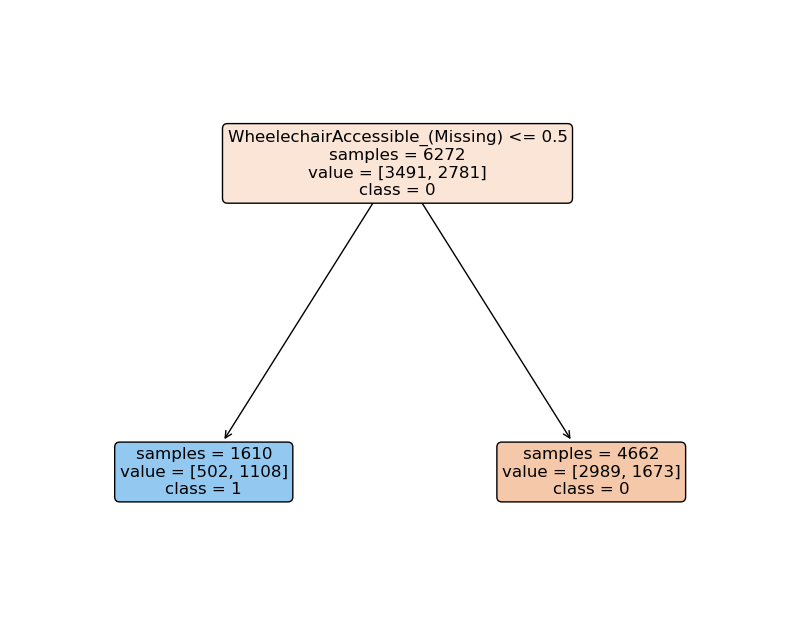

In [77]:
# Plot the classification decision tree
print('Node count =', clf.tree_.node_count)
plt.figure(figsize=(10, 8))
plot_tree(clf,
          feature_names=X_train.columns.tolist(),
          class_names=['0', '1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()


In [78]:
# Calculate confusion matrix
clf_conf_matrix = confusion_matrix(train_data['fourOrAbove'], y_pred_train)
accuracy = np.sum(np.diag(clf_conf_matrix)) / np.sum(clf_conf_matrix)
tpr, fpr = calculate_tpr_fpr(clf_conf_matrix)

print("Classification Tree Model (Training set):")
print("Confusion Matrix:")
print(clf_conf_matrix)
print("Accuracy:", accuracy)
print("TPR (True Positive Rate):", tpr)
print("FPR (False Positive Rate):", fpr)

Classification Tree Model (Training set):
Confusion Matrix:
[[2989  502]
 [1673 1108]]
Accuracy: 0.6532206632653061
TPR (True Positive Rate): 0.3984178353110392
FPR (False Positive Rate): 0.14379833858493268


In [79]:
# Calculate confusion matrix
clf_conf_matrix = confusion_matrix(test_data['fourOrAbove'], y_pred_test)
accuracy = np.sum(np.diag(clf_conf_matrix)) / np.sum(clf_conf_matrix)
tpr, fpr = calculate_tpr_fpr(clf_conf_matrix)

print("Classification Tree Model (test set):")
print("Confusion Matrix:")
print(clf_conf_matrix)
print("Accuracy:", accuracy)
print("TPR (True Positive Rate):", tpr)
print("FPR (False Positive Rate):", fpr)

Classification Tree Model (test set):
Confusion Matrix:
[[1302  213]
 [ 705  468]]
Accuracy: 0.6584821428571429
TPR (True Positive Rate): 0.3989769820971867
FPR (False Positive Rate): 0.1405940594059406


## Classification Tree Model with Cross-Validation

In [80]:
# Define the parameter grid
param_grid = {
    'min_samples_leaf': [5, 10],
    'ccp_alpha': np.linspace(0, 0.1, 201),
    'min_samples_split': [20],
    'max_depth': [30],
    'random_state': [88]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, train_data['fourOrAbove'])

# Get the best parameters and the corresponding mean cross-validated score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Mean Cross-Validated Score:", best_score)

Best Parameters: {'ccp_alpha': 0.0005, 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 20, 'random_state': 88}
Best Mean Cross-Validated Score: 0.6664546916004245


In [112]:
acc = grid_search.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = grid_search.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(5)

,ccp alpha,Validation Accuracy
0,0.0,0.636958
1,0.0,0.646206
2,0.0005,0.666454
3,0.0005,0.666455
4,0.001,0.661672


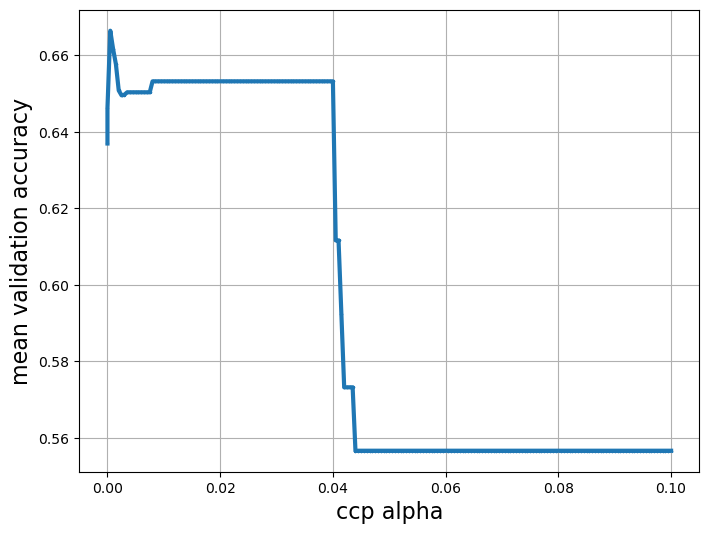

In [82]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

Node count = 93


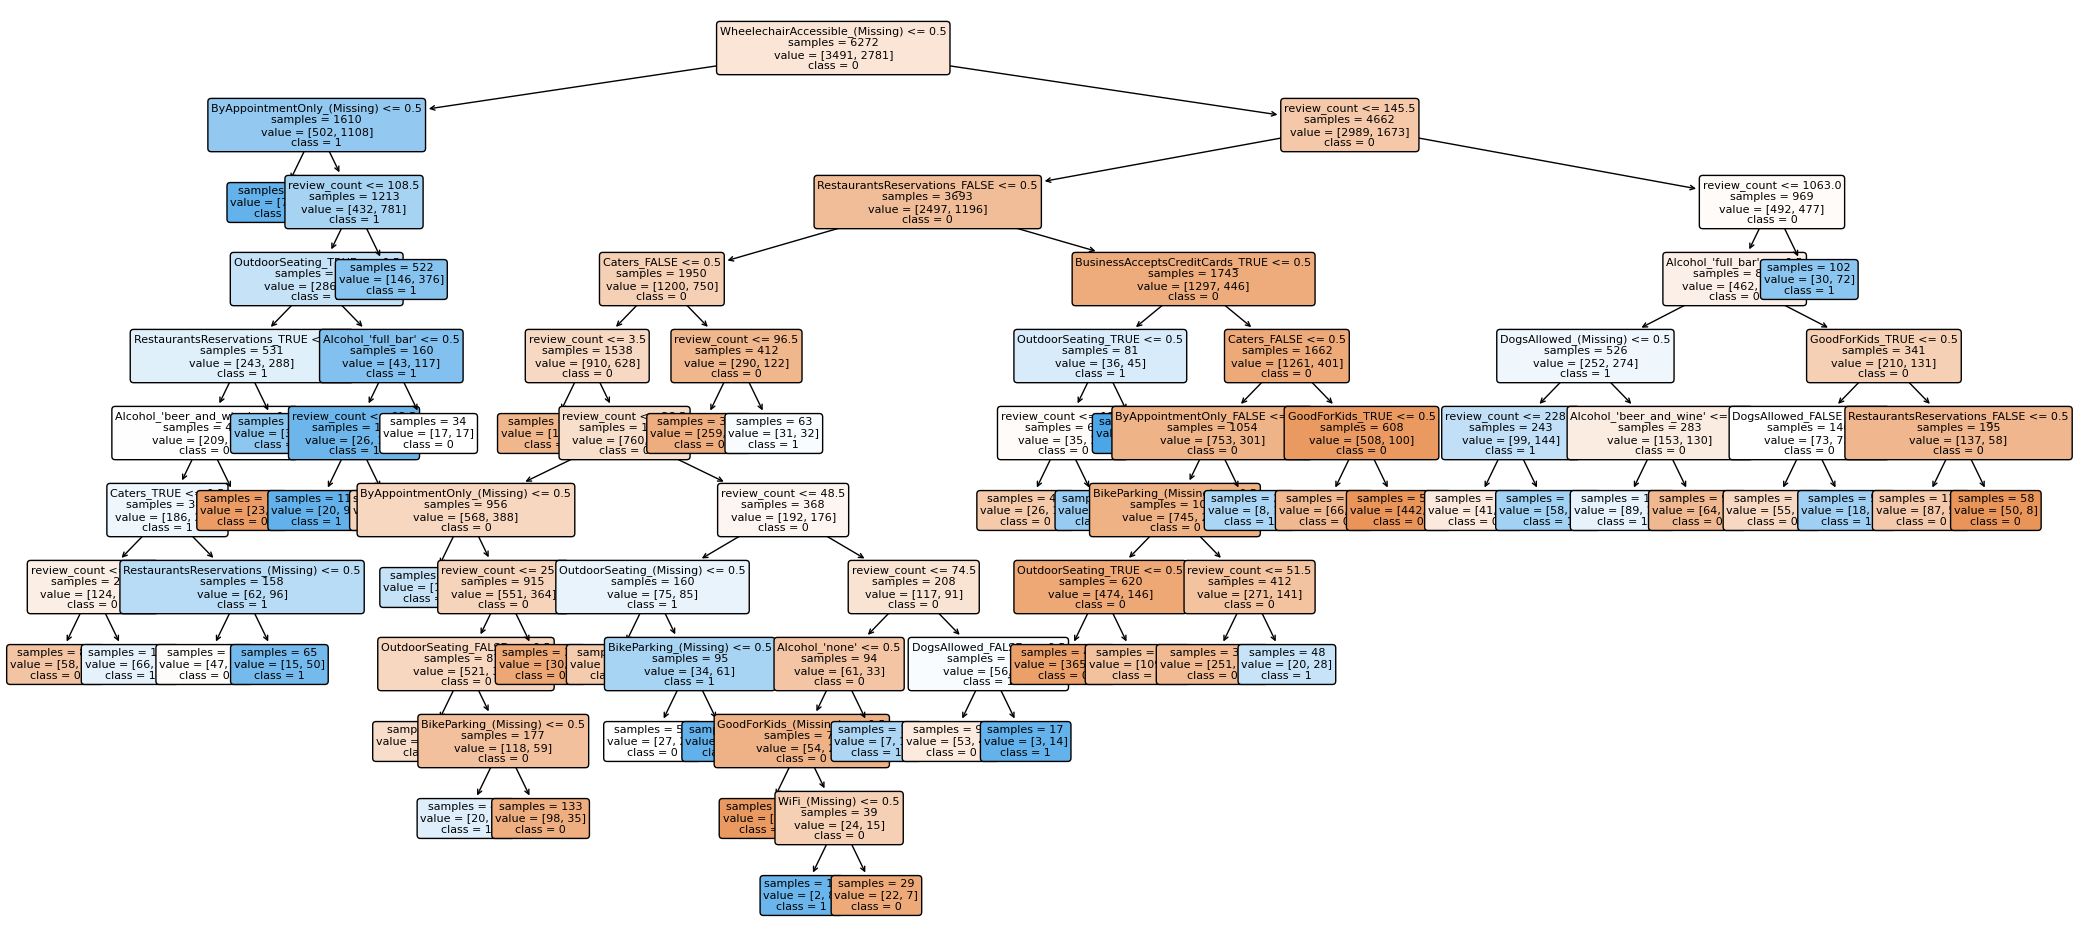

In [83]:
# Plot the classification decision tree
print('Node count =', grid_search.best_estimator_.tree_.node_count)
plt.figure(figsize=(26, 12))
plot_tree(grid_search.best_estimator_,
          feature_names=X_train.columns.tolist(),
          class_names=['0', '1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=8)
plt.show()

In [84]:
# Make predictions on the train and test data
y_pred_train = grid_search.best_estimator_.predict(X_train)
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Calculate confusion matrix
clf_conf_matrix = confusion_matrix(train_data['fourOrAbove'], y_pred_train)
accuracy = np.sum(np.diag(clf_conf_matrix)) / np.sum(clf_conf_matrix)
tpr, fpr = calculate_tpr_fpr(clf_conf_matrix)

print("Classification Tree Model (Training set):")
print("Confusion Matrix:")
print(clf_conf_matrix)
print("Accuracy:", accuracy)
print("TPR (True Positive Rate):", tpr)
print("FPR (False Positive Rate):", fpr)
print('')

# Calculate confusion matrix
clf_conf_matrix = confusion_matrix(test_data['fourOrAbove'], y_pred_test)
accuracy = np.sum(np.diag(clf_conf_matrix)) / np.sum(clf_conf_matrix)
tpr, fpr = calculate_tpr_fpr(clf_conf_matrix)

print("Classification Tree Model (test set):")
print("Confusion Matrix:")
print(clf_conf_matrix)
print("Accuracy:", accuracy)
print("TPR (True Positive Rate):", tpr)
print("FPR (False Positive Rate):", fpr)

Classification Tree Model (Training set):
Confusion Matrix:
[[2820  671]
 [1237 1544]]
Accuracy: 0.6957908163265306
TPR (True Positive Rate): 0.5551959726717008
FPR (False Positive Rate): 0.1922085362360355

Classification Tree Model (test set):
Confusion Matrix:
[[1200  315]
 [ 588  585]]
Accuracy: 0.6640625
TPR (True Positive Rate): 0.49872122762148335
FPR (False Positive Rate): 0.2079207920792079


## “How to guide” for Las Vegas restaurants

In [115]:
# Define the Decision Tree Classifier model
clf_shallow = DecisionTreeClassifier(max_leaf_nodes=10, ccp_alpha=0.0005, random_state=88)

# Fit the model on the training data
clf_shallow.fit(X_train, train_data['fourOrAbove'])

# Make predictions on the test data
y_pred_test = clf_shallow.predict(X_test)

Node count = 19


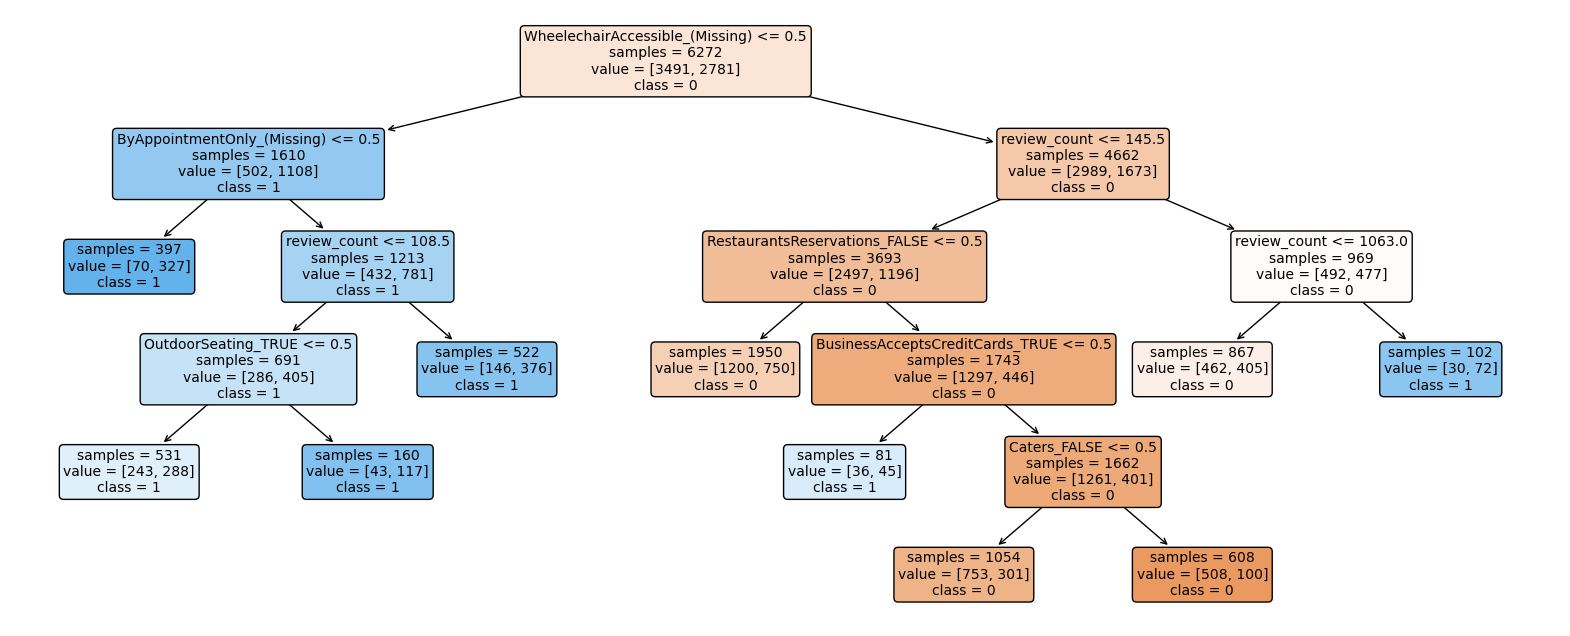

In [117]:
# Plot the classification decision tree
print('Node count =', clf_shallow.tree_.node_count)
plt.figure(figsize=(20, 8))
plot_tree(clf_shallow,
          feature_names=X_train.columns.tolist(),
          class_names=['0', '1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=10)
plt.show()